### Step1: Config The Platform, Crypto Algorithm and Oscope 

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET = 'TINYAES128C'

### Compile the firmware for introduced target

In [31]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../hardware/victims/firmware/simpleserial-aes
make PLATFORM=$1 CRYPTO_TARGET=$2

Building for platform CWLITEARM with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CWLITEARM.hex
rm -f -- simpleserial-aes-CWLITEARM.eep
rm -f -- simpleserial-aes-CWLITEARM.cof
rm -f -- simpleserial-aes-CWLITEARM.elf
rm -f -- simpleserial-aes-CWLITEARM.map
rm -f -- simpleserial-aes-CWLITEARM.sym
rm -f -- simpleserial-aes-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-aes.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s aes.s aes-independant.s
rm -f -- simpleserial-aes.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d aes.d aes-independant.d
rm -f -- simpleserial-aes.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i aes.i aes-independant.i
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Fou

### Step2: Configure and Connect to ChipWhisperer

In [33]:
import chipwhisperer as cw

try:
    if not scope.connectStatus:
        scope.con()
except NameError:
    scope = cw.scope()

try:
    if SS_VER == "SS_VER_2_1":
        target_type = cw.targets.SimpleSerial2
    elif SS_VER == "SS_VER_2_0":
        raise OSError("SS_VER_2_0 is deprecated. Use SS_VER_2_1")
    else:
        target_type = cw.targets.SimpleSerial
except:
    SS_VER="SS_VER_1_1"
    target_type = cw.targets.SimpleSerial

try:
    target = cw.target(scope, target_type)
except:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope, target_type)


print("INFO: Found ChipWhisperer😍")


INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.
INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.
INFO: Found ChipWhisperer😍


### Step3: config the programmer based on the target

In [34]:
if "STM" in PLATFORM or PLATFORM == "CWLITEARM" or PLATFORM == "CWNANO":
    prog = cw.programmers.STM32FProgrammer
elif PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
    prog = cw.programmers.XMEGAProgrammer
else:
    prog = None

In [35]:
import time
time.sleep(0.05)
scope.default_setup()
def reset_target(scope):
    if PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
        scope.io.pdic = 'low'
        time.sleep(0.1)
        scope.io.pdic = 'high_z' #XMEGA doesn't like pdic driven high
        time.sleep(0.1) #xmega needs more startup time
    else:  
        scope.io.nrst = 'low'
        time.sleep(0.05)
        scope.io.nrst = 'high_z'
        time.sleep(0.05)

### Program the target

In [36]:
fw_path = '../../hardware/victims/firmware/simpleserial-aes/simpleserial-aes-{}.hex'.format(PLATFORM)
cw.program_target(scope, prog, fw_path)

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 6235 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 6235 bytes


### Step4: Trace record and dataset construction

In [37]:
#Capture Traces

from tqdm import trange
import numpy as np


N = 100  # Number of traces
ktp = cw.ktp.TVLATTest()
ktp.init(N) # init with the number of traces you plan to

traces = []
Fix_text = bytearray.fromhex("da39a3ee5e6b4b0d3255bfef95601890")

Random_project = cw.create_project("RandomSet.cwp")
Fix_project = cw.create_project("FixSet.cwp")

for i in trange(N, desc='Capturing traces'):
    key, text = ktp.next() # manual creation of a key, text pair can be substituted here
  
    trace = ...
    

Capturing traces: 100%|██████████| 10000/10000 [05:22<00:00, 30.97it/s]


np.save("Fix_dastaset.npy",Fix_project.waves[:][:])
np.save("Rand_dastaset.npy",Random_project.waves[:][:])

### Step5: Apply the TVLA test and plot the result

Number of leaky points: 1017


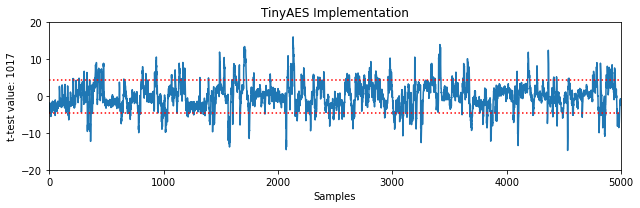

In [27]:
from scipy import stats
import matplotlib.pyplot as plt 
ttest_rslt, pvalue_rslt = stats.ttest_ind(..., equal_var=False)

#Code needs to be compeleted

#Plot the TVLA Graph
plt.figure(figsize=(9, 3))
plt.plot(ttest_rslt)
plt.xlabel("Samples")
plt.ylabel("t-test value: " + str(len(fails_tvla)))
plt.axhline(y=4.5, color='r', linestyle=':')
plt.axhline(y=-4.5, color='r', linestyle=':')
plt.ylim((-20, 20))
plt.xlim((0, len(ttest_rslt)))
plt.title('TinyAES Implementation')
plt.savefig("TinyAes_TVLA.jpg")
plt.tight_layout()
